# **Milling Machine Predicive Maintance**

Here we want to look at this synthetic dataset that performs similarly to a milling machine, it is consistent of 10,000 datapoints each with 14 features. Dataset can be found here: https://archive-beta.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

### **Feature Description**
###### Grabbed from UCI Machine Learning Repository

1. UID: unique identifier ranging from 1 to 10000
2. product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
3. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
4. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
5. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
6. torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values. 
7. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a

'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
1. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
2. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
3. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
4. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
5. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.


### **Data Prep**

In [1]:

import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ai4i2020.csv')

df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [2]:
df.head(5)



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# rename columns
df.rename(columns = {'Air temperature [K]':'air_temp',
                     'Process temperature [K]':'process_temp',
                     'Rotational speed [rpm]':'rot_speed',
                     'Torque [Nm]':'torque',
                     'Tool wear [min]':'tool_wear',
                     'Type': 'type',
                     'Machine failure':'machine_failure'} ,inplace = True)

#drop productid and UDI (UDI redundant with index in place)
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)


In [4]:
df.head()

,type,air_temp,process_temp,rot_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### **Data Exploration**

Seems that there is no null or error values, data cleaning is not necessary in this case. All numerical values should be converted to the same data type for ease of access.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             10000 non-null  object 
 1   air_temp         10000 non-null  float64
 2   process_temp     10000 non-null  float64
 3   rot_speed        10000 non-null  int64  
 4   torque           10000 non-null  float64
 5   tool_wear        10000 non-null  int64  
 6   machine_failure  10000 non-null  int64  
 7   TWF              10000 non-null  int64  
 8   HDF              10000 non-null  int64  
 9   PWF              10000 non-null  int64  
 10  OSF              10000 non-null  int64  
 11  RNF              10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [6]:
# numeric description
df_numeric = df.select_dtypes(include=[np.number])
# formatting
df_numeric.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
air_temp,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
process_temp,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
rot_speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
tool_wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
machine_failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


From the information here we can see a couple of things before we get into visualization:

1. rot_speed(rotational speed) sees a comparitively large standard deviation, this might be indicative of different use cases of the milling machine, different materials might demand a difference in rotational speed. Variability in this case might not be concerning enough to handle, however outliers might need be dealt with.
2. tool_wear(Tool wear): sees a comparitivey large standard deviation, might have to do with the age of the tools and frequency of their uses.
3. Air and Process temp. see similar profiles(mean, min, max), they might be correlated. We can check with a correlation matrix later.

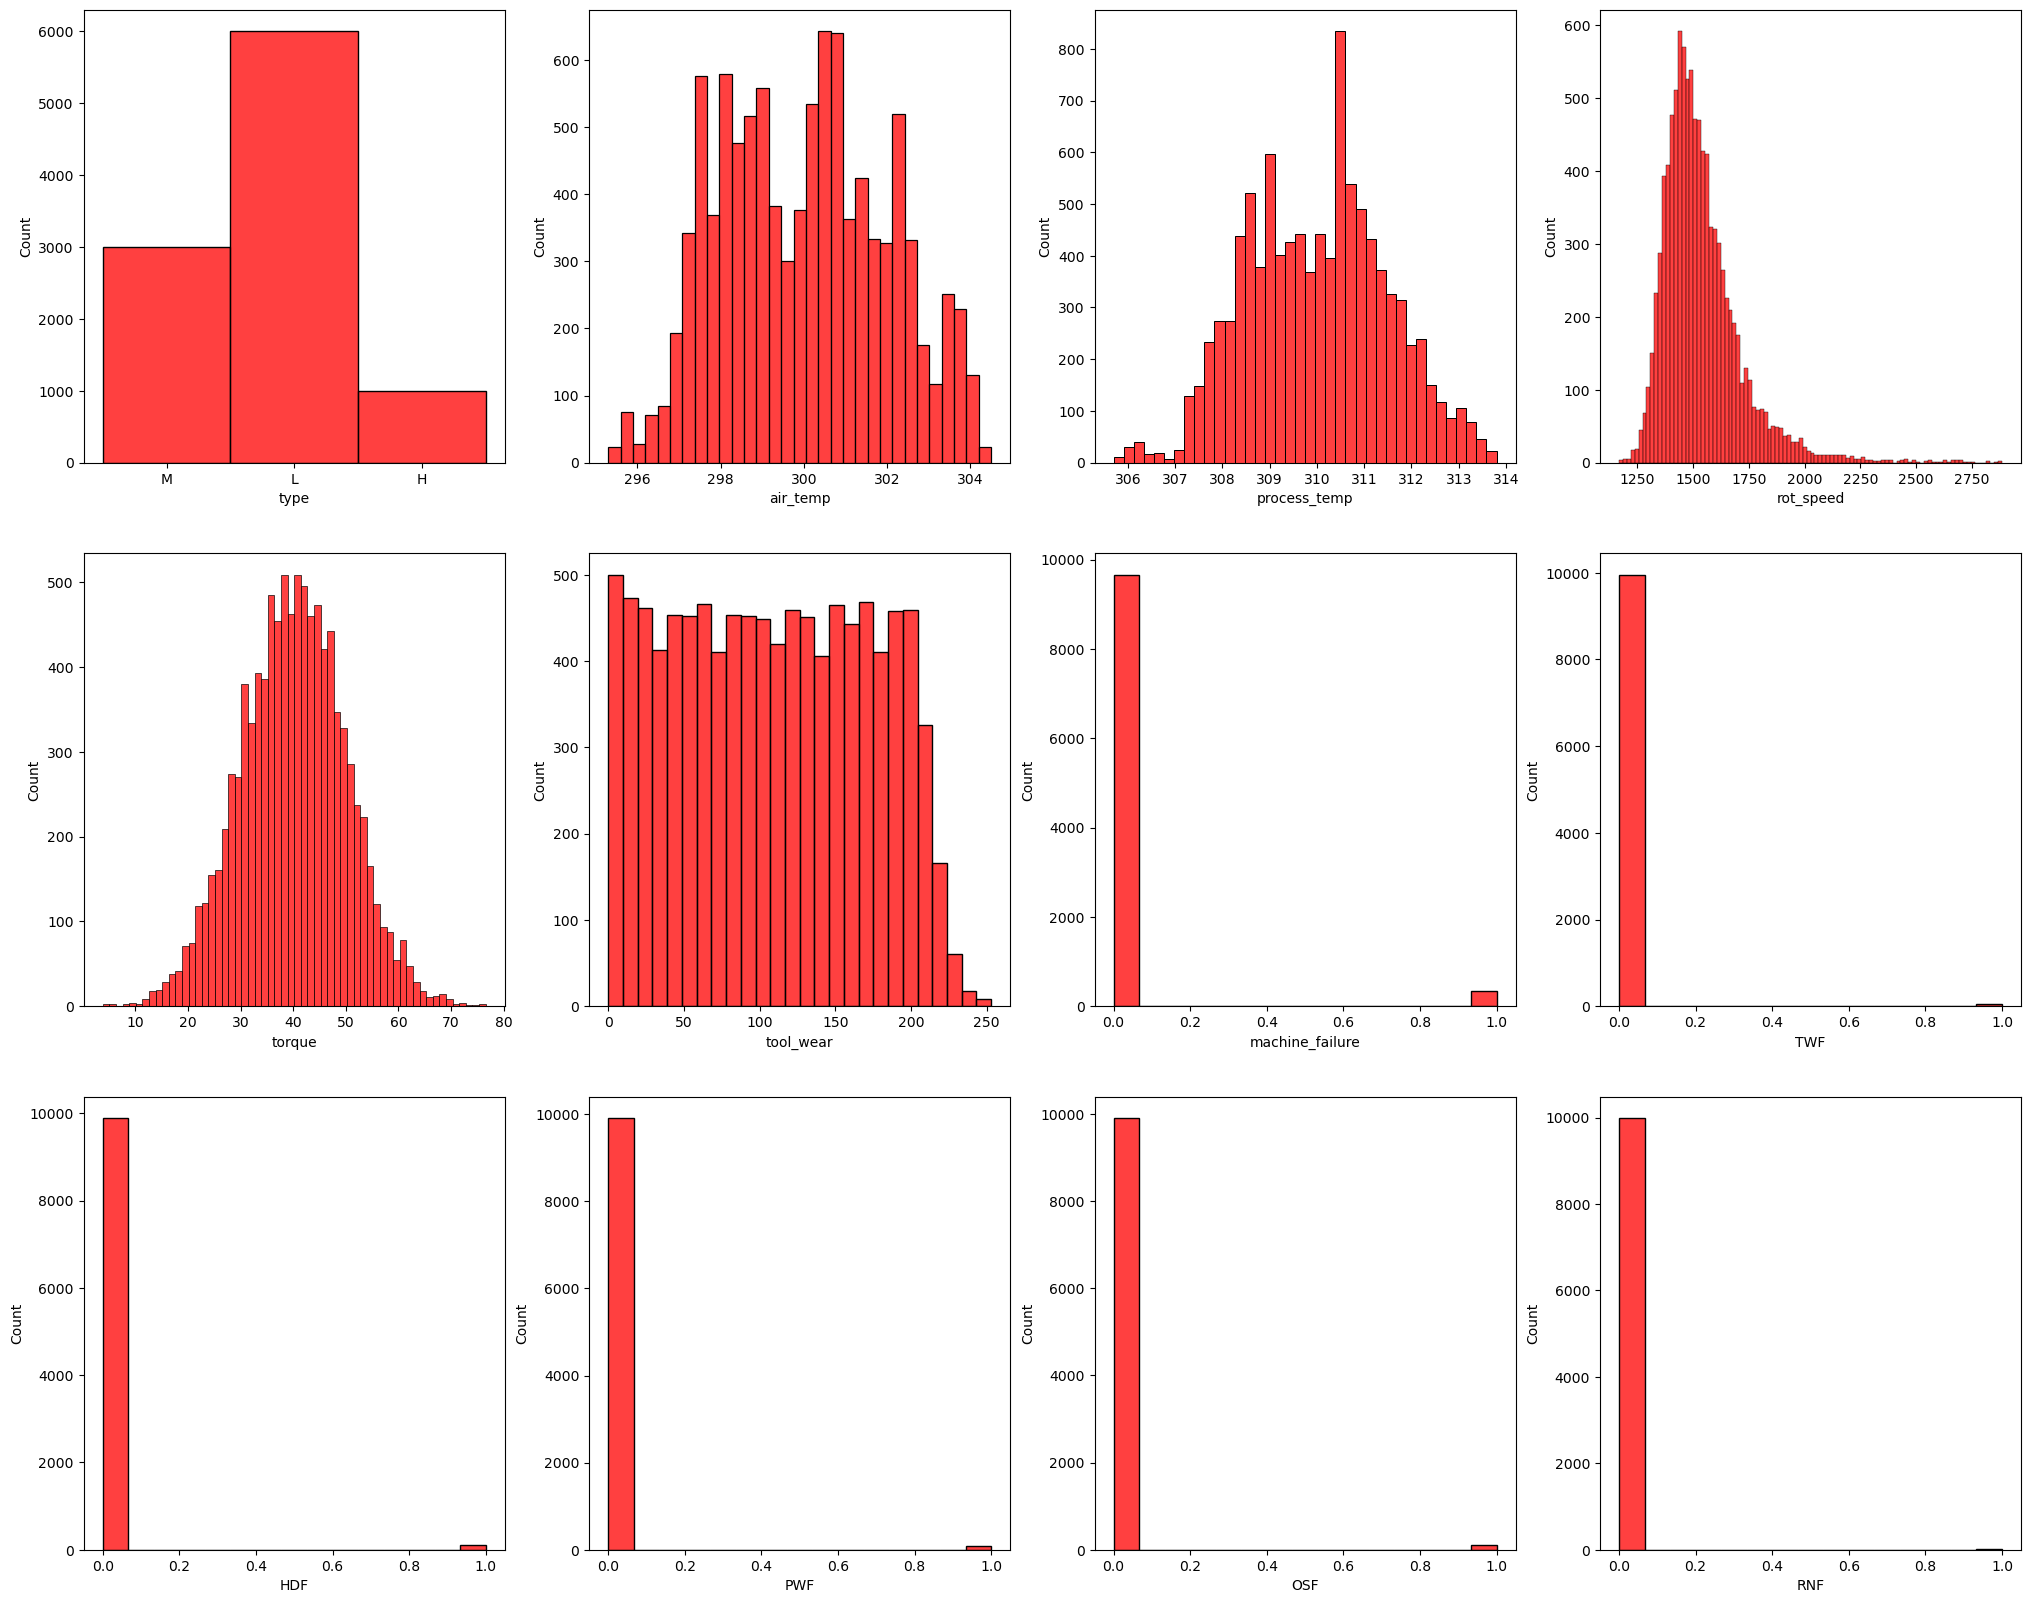

In [7]:
# Data Visualization, distribution of features
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4], color = 'red')

As seen above, there exists some features that would deem the data imbalanced. All Machine failures are imbalanced and type can be considered to be imbalanced as well. This makes the data difficult to train with since it might create a biased and over fitted model. The model will be too focused on the majority of the data, poorly generalizing the data.

Also the variability in rotational speed presents itself, and exhibits a right skew in the data.

<AxesSubplot:xlabel='type', ylabel='count'>

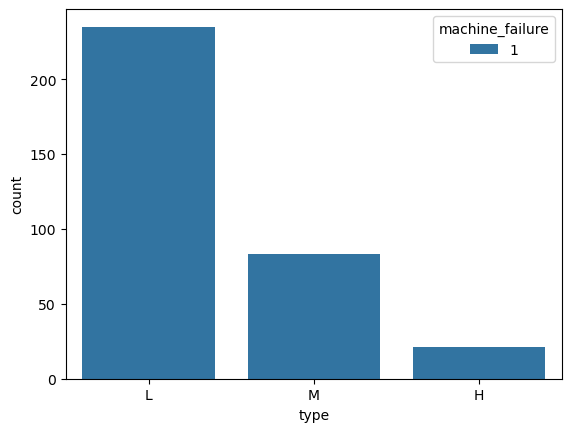

In [8]:
sns.countplot(x='type', hue='machine_failure', data=df[df['machine_failure']==1])



There does seem to be an association between type and the amount of failures, we will keep the type variable for now.

### Feature Engineering And Preprocessing

We can simplify a couple of the features here to even out the distribution and balance the data better. For the sake of simplification, in this model we will focus only on just whether or not a particular record is at risk for failure. This would mean to drop the individual failure features in favor of keeping just the general Machine Failure feature.

Additionally, we can gather from existing knowledge that from rotational speed and torque we can derive a formula to get power:

Power[kW] = torque[nm] x rotational speed[rpm]

In [9]:
#drop individual failure columns.
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)



<AxesSubplot:xlabel='power', ylabel='Count'>

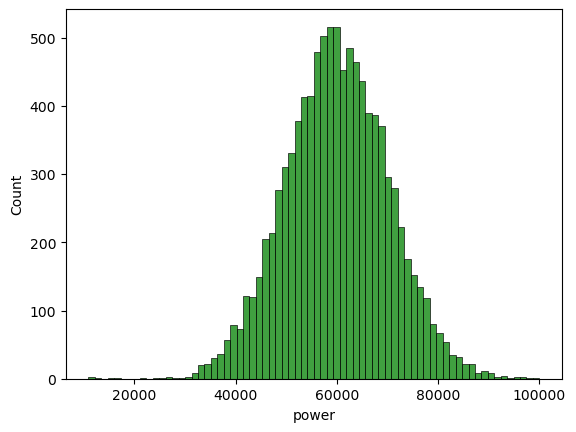

In [10]:
# creating power feature

df['power'] = df[['rot_speed', 'torque']].product(axis=1)

sns.histplot(df['power'],color='green')


As seen above, this combination of features creates a normalized distribution and gets rid of the right skew that was present in the rotational speed. We can now drop the rotational speed and torque columns.

In [11]:
# Change type to numerical

df['type'].replace({'L':0,'M':1,'H':2}, inplace=True)

# data type conversion

for col in df.columns:
    df[col] = df[col].astype(float)

df.dtypes
 

type               float64
air_temp           float64
process_temp       float64
rot_speed          float64
torque             float64
tool_wear          float64
machine_failure    float64
power              float64
dtype: object

In [12]:
df_profile = pdpf.ProfileReport(df, dark_mode=True)
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

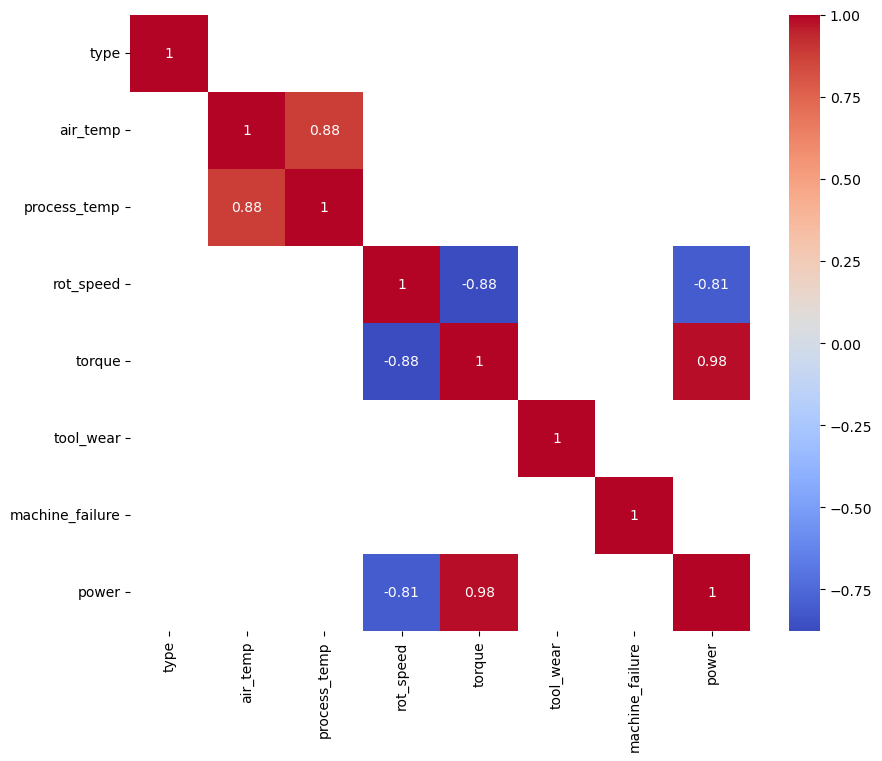

In [13]:
threshold = 0.5
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=matrix)

rot speed, power and torque are heavily correlated so it would probably be best to drop rot_speed and torque in favor of torque. (might need to test with and without rot_speed and torque)

while air and process temp do show a strong correlation, I'm choosing to keep it here because there might be a meaningful connection between the two.




In [14]:
# reorder

reorder = ['type', 'air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear', 'power', 'machine_failure']
df = df[reorder]
df

,type,air_temp,process_temp,rot_speed,torque,tool_wear,power,machine_failure
0,1.0,298.1,308.6,1551.0,42.8,0.0,66382.8,0.0
1,0.0,298.2,308.7,1408.0,46.3,3.0,65190.4,0.0
2,0.0,298.1,308.5,1498.0,49.4,5.0,74001.2,0.0
3,0.0,298.2,308.6,1433.0,39.5,7.0,56603.5,0.0
4,0.0,298.2,308.7,1408.0,40.0,9.0,56320.0,0.0
...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,1604.0,29.5,14.0,47318.0,0.0
9996,2.0,298.9,308.4,1632.0,31.8,17.0,51897.6,0.0
9997,1.0,299.0,308.6,1645.0,33.4,22.0,54943.0,0.0
9998,2.0,299.0,308.7,1408.0,48.5,25.0,68288.0,0.0


### **Modeling**

Time to split the data and get it ready for training.

A couple of problems we still need to address:
1. The data is still imbalanced, apply SMOTE in order to rebalance.
2. Apply a min max scaler to the data
3. Split the data for training




In [15]:
# assigning X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [16]:
# importing for splitting the data

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state= 0 , stratify=y)


In [17]:
# Importing samplers, will test all three including no oversampling as a control to see effect on model performance.

from imblearn.over_sampling import SVMSMOTE,SMOTE, RandomOverSampler


oversamp = RandomOverSampler(random_state= 40)
X_train, y_train = oversamp.fit_resample(X_train, y_train)


(array([6763.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

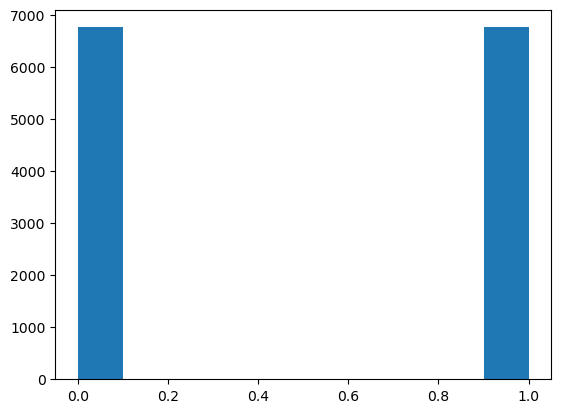

In [18]:
plt.hist(y_train)


Here we can see a more equal sample, hopefully this can improve the results of the model.

### Scaler

In [19]:
# applying scaler

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
# apply the same scaler to the test data(IMPORTANT)

X_test = mms.fit_transform(X_test)


Performance Table

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, plot_confusion_matrix,matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix
import time

performance = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'MCC Score', 'Training Time', 'Prediction Time','Time Total'])



#### **Logistical Regression / Classification**

In [21]:

from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression(max_iter= 500).fit(X_train,y_train)
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()



In [22]:
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict, average='weighted')
precision = precision_score(y_test, y_predict, average='weighted')
f1s = f1_score(y_test, y_predict, average='weighted')
corrcoef = matthews_corrcoef(y_test, y_predict)
ROCAUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"MCC: {corrcoef:.2%}")
print(f"ROC AUC score: {ROCAUC:.2%}")
print(f"time to train: {end_train-start:.2f} s")
print(f"time to predict: {end_predict-end_train:.2f} s")
print(f"total: {end_predict-start:.2f} s")
performance.loc['Logistic Regression'] = [accuracy, recall, precision, f1s,corrcoef,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 80.20%
Recall: 80.20%
Precision: 96.42%
F1-Score: 86.40%
MCC: 28.48%
ROC AUC score: 91.12%
time to train: 0.06 s
time to predict: 0.00 s
total: 0.06 s


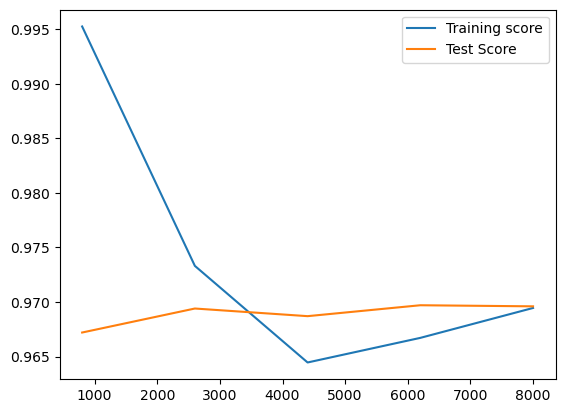

In [23]:

from sklearn.model_selection import learning_curve

train_sizes, train_score, test_score = learning_curve(model, X, y, cv=5)

plt.plot(train_sizes, train_score.mean(axis=1), label = 'Training score')
plt.plot(train_sizes, test_score.mean(axis=1), label = 'Test Score')
plt.legend(loc='best')
plt.show()

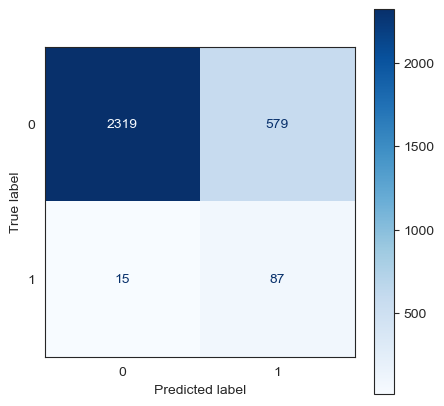

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")

cm = confusion_matrix(y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()


In [26]:
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict, average='weighted')
precision = precision_score(y_test, y_predict, average='weighted')
f1s = f1_score(y_test, y_predict, average='weighted')
corrcoef = matthews_corrcoef(y_test, y_predict)
ROCAUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"MCC: {corrcoef:.2%}")
print(f"ROC AUC score: {ROCAUC:.2%}")
print(f"time to train: {end_train-start:.2f} s")
print(f"time to predict: {end_predict-end_train:.2f} s")
print(f"total: {end_predict-start:.2f} s")
performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,corrcoef,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.90%
Recall: 95.90%
Precision: 96.55%
F1-Score: 96.19%
MCC: 47.00%
ROC AUC score: 77.07%
time to train: 0.04 s
time to predict: 0.00 s
total: 0.04 s


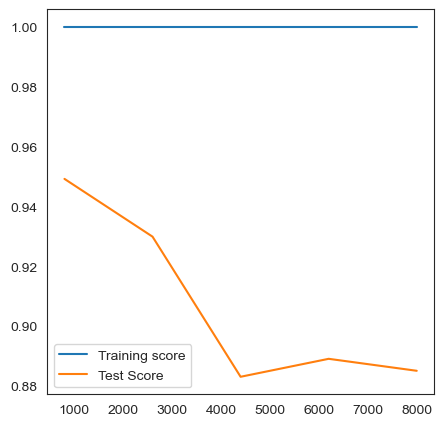

In [27]:

from sklearn.model_selection import learning_curve

train_sizes, train_score, test_score = learning_curve(model, X, y, cv=5)

plt.plot(train_sizes, train_score.mean(axis=1), label = 'Training score')
plt.plot(train_sizes, test_score.mean(axis=1), label = 'Test Score')
plt.legend(loc='best')
plt.show()


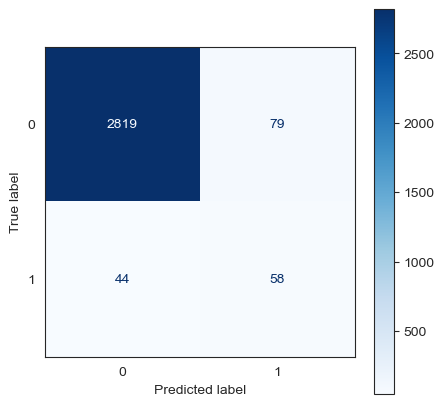

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")

cm = confusion_matrix(y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Random Forest Classifier**

In [29]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators=100,random_state=0, bootstrap=True, n_jobs=-1).fit(X_train,y_train) #bootstrapping can help with feature importance
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()





In [30]:
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict, average='weighted')
precision = precision_score(y_test, y_predict, average='weighted')
f1s = f1_score(y_test, y_predict, average='weighted')
corrcoef = matthews_corrcoef(y_test, y_predict)
ROCAUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"MCC: {corrcoef:.2%}")
print(f"ROC AUC score: {ROCAUC:.2%}")
print(f"time to train: {end_train-start:.2f} s")
print(f"time to predict: {end_predict-end_train:.2f} s")
print(f"total: {end_predict-start:.2f} s")
performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,corrcoef,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.93%
Recall: 96.93%
Precision: 97.14%
F1-Score: 97.03%
MCC: 56.34%
ROC AUC score: 95.60%
time to train: 0.28 s
time to predict: 0.02 s
total: 0.30 s


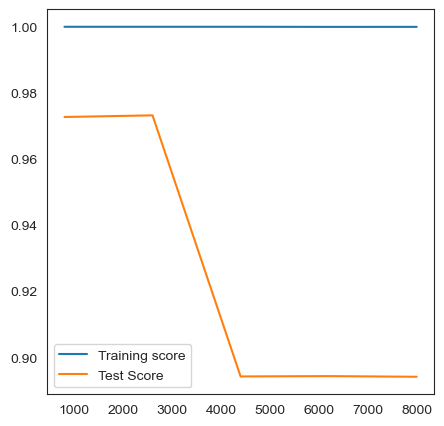

In [31]:

from sklearn.model_selection import learning_curve

train_sizes, train_score, test_score = learning_curve(model, X, y, cv=5)

plt.plot(train_sizes, train_score.mean(axis=1), label = 'Training score')
plt.plot(train_sizes, test_score.mean(axis=1), label = 'Test Score')
plt.legend(loc='best')
plt.show()


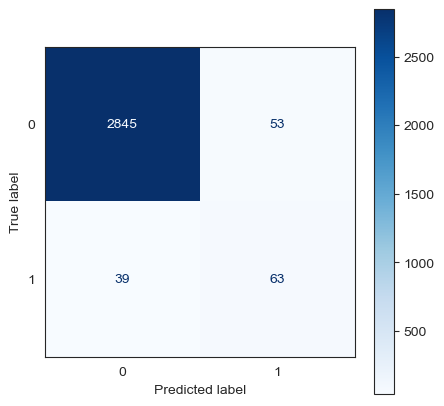

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")

cm = confusion_matrix(y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Underfit

interestingly enough, power torque and rotational speed(all correlated) take precedence here in importance.

### **Gradient Boosting**

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train) 
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()

In [34]:
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict, average='weighted')
precision = precision_score(y_test, y_predict, average='weighted')
f1s = f1_score(y_test, y_predict, average='weighted')
corrcoef = matthews_corrcoef(y_test, y_predict)
ROCAUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"MCC: {corrcoef:.2%}")
print(f"ROC AUC score: {ROCAUC:.2%}")
print(f"time to train: {end_train-start:.2f} s")
print(f"time to predict: {end_predict-end_train:.2f} s")
print(f"total: {end_predict-start:.2f} s")
performance.loc['Gradient Boosting'] = [accuracy, recall, precision, f1s,corrcoef,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.27%
Recall: 92.27%
Precision: 97.12%
F1-Score: 94.07%
MCC: 47.59%
ROC AUC score: 95.55%
time to train: 1.69 s
time to predict: 0.01 s
total: 1.70 s


underfit


Type seems to generally be inconsequential to prediction, might want to add test dummies or drop the type class entirely.

### **Neural Network (MLP)**

In [35]:
from sklearn.neural_network import MLPClassifier   
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (100, 100,)
                      ,activation='relu'
                      ,solver= 'adam'
                      ,batch_size= 128
                      ,max_iter=500
                      ,verbose=0).fit(X_train, y_train)

end_train = time.time()
y_predict = model.predict(X_test)
end_predict = time.time()


In [36]:
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict, average='weighted')
precision = precision_score(y_test, y_predict, average='weighted')
f1s = f1_score(y_test, y_predict, average='weighted')
corrcoef = matthews_corrcoef(y_test, y_predict)
ROCAUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"MCC: {corrcoef:.2%}")
print(f"ROC AUC score: {ROCAUC:.2%}")
print(f"time to train: {end_train-start:.2f} s")
print(f"time to predict: {end_predict-end_train:.2f} s")
print(f"total: {end_predict-start:.2f} s")
performance.loc['MLP Neural Network'] = [accuracy, recall, precision, f1s,corrcoef,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.00%
Recall: 92.00%
Precision: 96.89%
F1-Score: 93.85%
MCC: 44.73%
ROC AUC score: 92.92%
time to train: 26.03 s
time to predict: 0.01 s
total: 26.04 s


In [37]:


if 2000 > len(X):
    print("Error: Batch size is larger than the total number of samples.")
else:
    print("Batch size is valid.")

Batch size is valid.


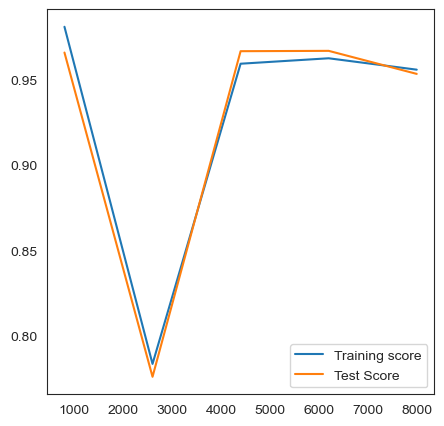

In [38]:

from sklearn.model_selection import learning_curve

train_sizes, train_score, test_score = learning_curve(model, X, y, cv=5)

plt.plot(train_sizes, train_score.mean(axis=1), label = 'Training score')
plt.plot(train_sizes, test_score.mean(axis=1), label = 'Test Score')
plt.legend(loc='best')
plt.show()


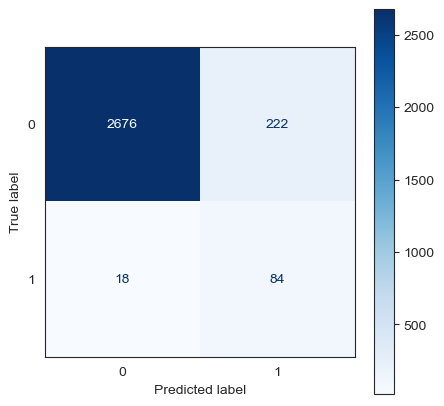

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")

cm = confusion_matrix(y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Gaussian Naive Bayes**

In [40]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()

In [41]:
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict, average='weighted')
precision = precision_score(y_test, y_predict, average='weighted')
f1s = f1_score(y_test, y_predict, average='weighted')
corrcoef = matthews_corrcoef(y_test, y_predict)
ROCAUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"MCC: {corrcoef:.2%}")
print(f"ROC AUC score: {ROCAUC:.2%}")
print(f"time to train: {end_train-start:.2f} s")
print(f"time to predict: {end_predict-end_train:.2f} s")
print(f"total: {end_predict-start:.2f} s")
performance.loc['Gaussian NB'] = [accuracy, recall, precision, f1s,corrcoef,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 84.53%
Recall: 84.53%
Precision: 96.14%
F1-Score: 89.12%
MCC: 28.98%
ROC AUC score: 88.20%
time to train: 0.01 s
time to predict: 0.00 s
total: 0.01 s


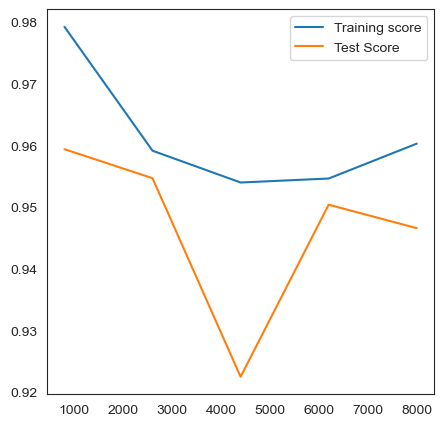

In [42]:

from sklearn.model_selection import learning_curve

train_sizes, train_score, test_score = learning_curve(model, X, y, cv=5)

plt.plot(train_sizes, train_score.mean(axis=1), label = 'Training score')
plt.plot(train_sizes, test_score.mean(axis=1), label = 'Test Score')
plt.legend(loc='best')
plt.show()


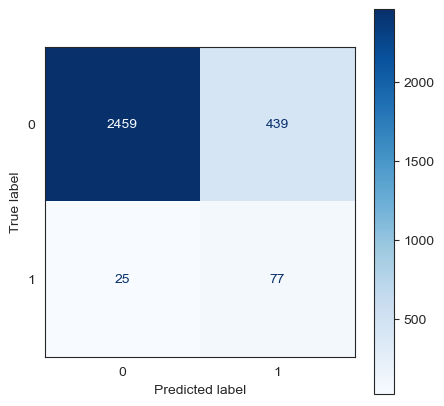

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")

cm = confusion_matrix(y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Evaluation**

In [44]:
performance.fillna(0.90, inplace=True)
performance.style.background_gradient(cmap='coolwarm').format({
    'Accuracy': '{:.2%}',
    'Precision': '{:.2%}',
    'Recall': '{:.2%}',
    'F1-Score': '{:.2%}',
    'MCC score': '{:.2%}',
    'time to train': '{:.1f}',
    'time to predict': '{:.1f}',
    'total time': '{:.1f}'
})
performance.sort_values(by='Accuracy', ascending=False, inplace=True)
performance


,Accuracy,Recall,Precision,F1-Score,MCC Score,Training Time,Prediction Time,Time Total
Random Forest,0.969333,0.969333,0.971402,0.970281,0.563390,0.280163,0.020950,0.301113
Decision Tree,0.959000,0.959000,0.965548,0.961878,0.469970,0.040725,0.000743,0.041468
Gradient Boosting,0.922667,0.922667,0.971160,0.940669,0.475865,1.691937,0.006521,1.698458
MLP Neural Network,0.920000,0.920000,0.968879,0.938541,0.447267,26.033981,0.009206,26.043187
Gaussian NB,0.845333,0.845333,0.961351,0.891190,0.289779,0.005642,0.000676,0.006318
Logistic Regression,0.802000,0.802000,0.964233,0.864031,0.284822,0.060297,0.000292,0.060589


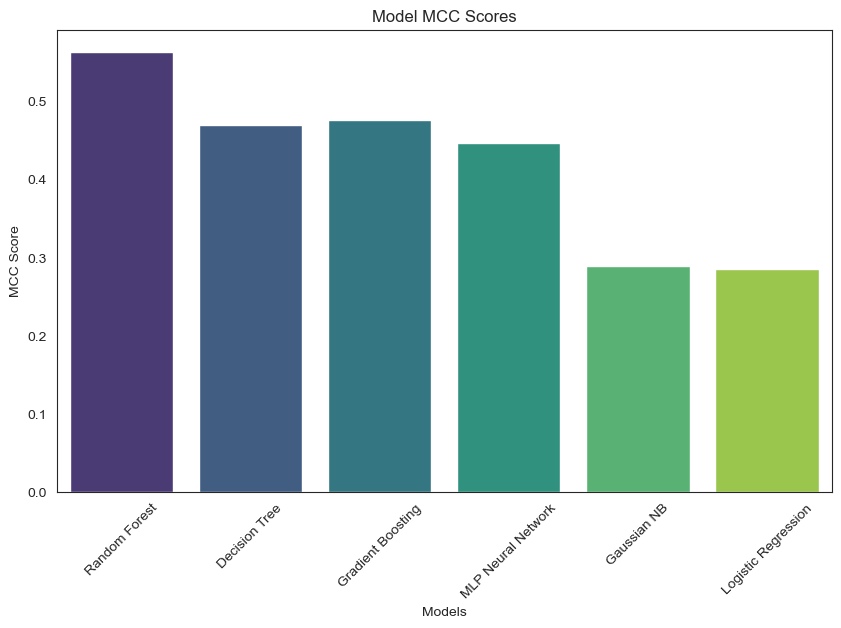

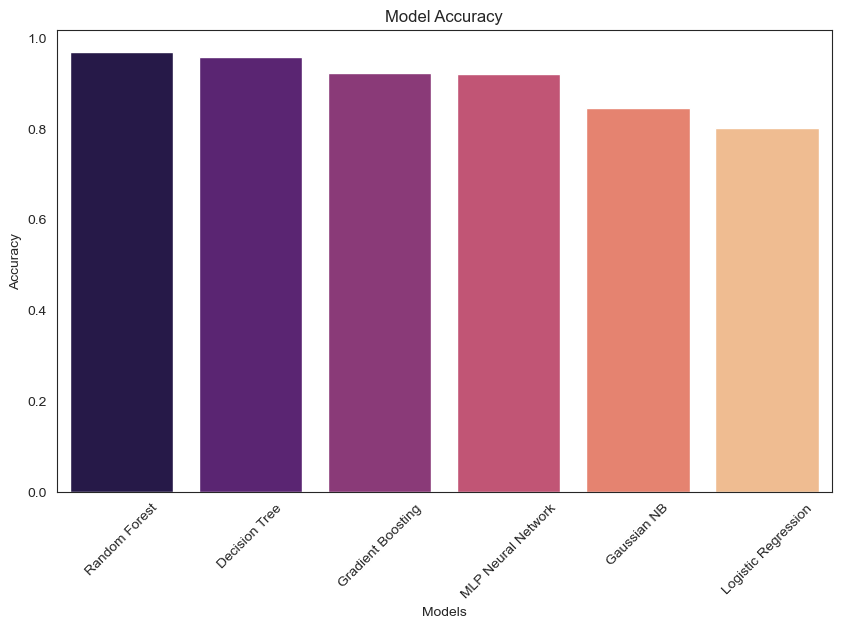

In [45]:

plt.figure(figsize=(10, 6))
sns.barplot(x=performance.index, y=performance['MCC Score'], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('MCC Score')
plt.title('Model MCC Scores')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=performance.index, y=performance['Accuracy'], palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()



### **Conclusion**

After considering the MCC score and model fitting, the Random Forest Model emerges as the best performing model in this case. It has the highest accuracy among all models. This outcome is particularly noteworthy given the initial concern stemming from the dataset's significant class imbalance. The next best model, Gradient Boosting, exhibits the second-highest MCC score, although its accuracy falls short, implying a demand for additional data and refinement in future iterations. The observed learning curves show the requirement for more balanced data to substantially enhance the performance of all models.

To elevate the results of these models further, it would be necessary to procure a larger, balanced dataset. This change in data quality and quantity would hopefully facilitate more robust model fitting, allowing us to read the learning curves with more discernability. Notably, a common pattern from the learning curves is overfitting across most models, suggesting that the models would not handle generalization amongst more diverse datasets.

Using a Random forest model could allow us to at least warn of whether or not a particular milling machine is at risk for failure.